In [38]:

# import Libraries
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [39]:
import pandas as pd

# Load the dataset
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Display unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}

# Print unique values
for col, values in unique_values.items():
    print(f"Column: {col}")
    print(values)
    print("="*50)


Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender
['Female' 'Male']
Column: SeniorCitizen
[0 1]
Column: Partner
['Yes' 'No']
Column: Dependents
['No' 'Yes']
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService
['No' 'Yes']
Column: MultipleLines
['No phone service' 'No' 'Yes']
Column: InternetService
['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
Column: OnlineBackup
['Yes' 'No' 'No internet service']
Column: DeviceProtection
['No' 'Yes' 'No internet service']
Column: TechSupport
['No' 'Yes' 'No internet service']
Column: StreamingTV
['No' 'Yes' 'No internet service']
Column: StreamingMovies
['No' 'Yes' 'No internet service']
Column: Contract
['Month-to-month' 'One year' 'Two ye

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Change this to your actual file path
df = pd.read_csv(file_path)

# Drop unnecessary columns
df.drop(columns=['customerID'], inplace=True, errors='ignore')

# Convert binary categorical columns directly to integers
binary_mapping = {
    "Yes": 1,
    "No": 0,
    "No phone service": 2,
    "No internet service": 2,
    "Female": 0,
    "Male": 1
}
df.replace(binary_mapping, inplace=True)

# Convert 'TotalCharges' to numeric, handling errors and filling NaN values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0)

# Identify remaining categorical columns that need encoding
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to remaining categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = df[col].astype(str)  # Ensure all values are string type before encoding
    df[col] = label_encoder.fit_transform(df[col])

# Optimize integer columns for memory efficiency
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

# Save the processed dataset
df.to_csv("processed_telco_data.csv", index=False)

# Print the first few rows of the cleaned dataset
print(df.head())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService   
0       0              0        1           0       1             0  \
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup   
0              2                1               0             1  \
1              0                1               1             0   
2              0                1               1             1   
3              2                1               1             0   
4              0                2               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract   
0                 0            0            0                0         0  \
1                 


Correlation with Churn:
Churn               1.000000
InternetService     0.316846
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.019423
PhoneService        0.011942
gender             -0.008612
Partner            -0.150448
Dependents         -0.164221
TotalCharges       -0.198324
StreamingTV        -0.205742
StreamingMovies    -0.207256
DeviceProtection   -0.281465
OnlineBackup       -0.291449
TechSupport        -0.329852
OnlineSecurity     -0.332819
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


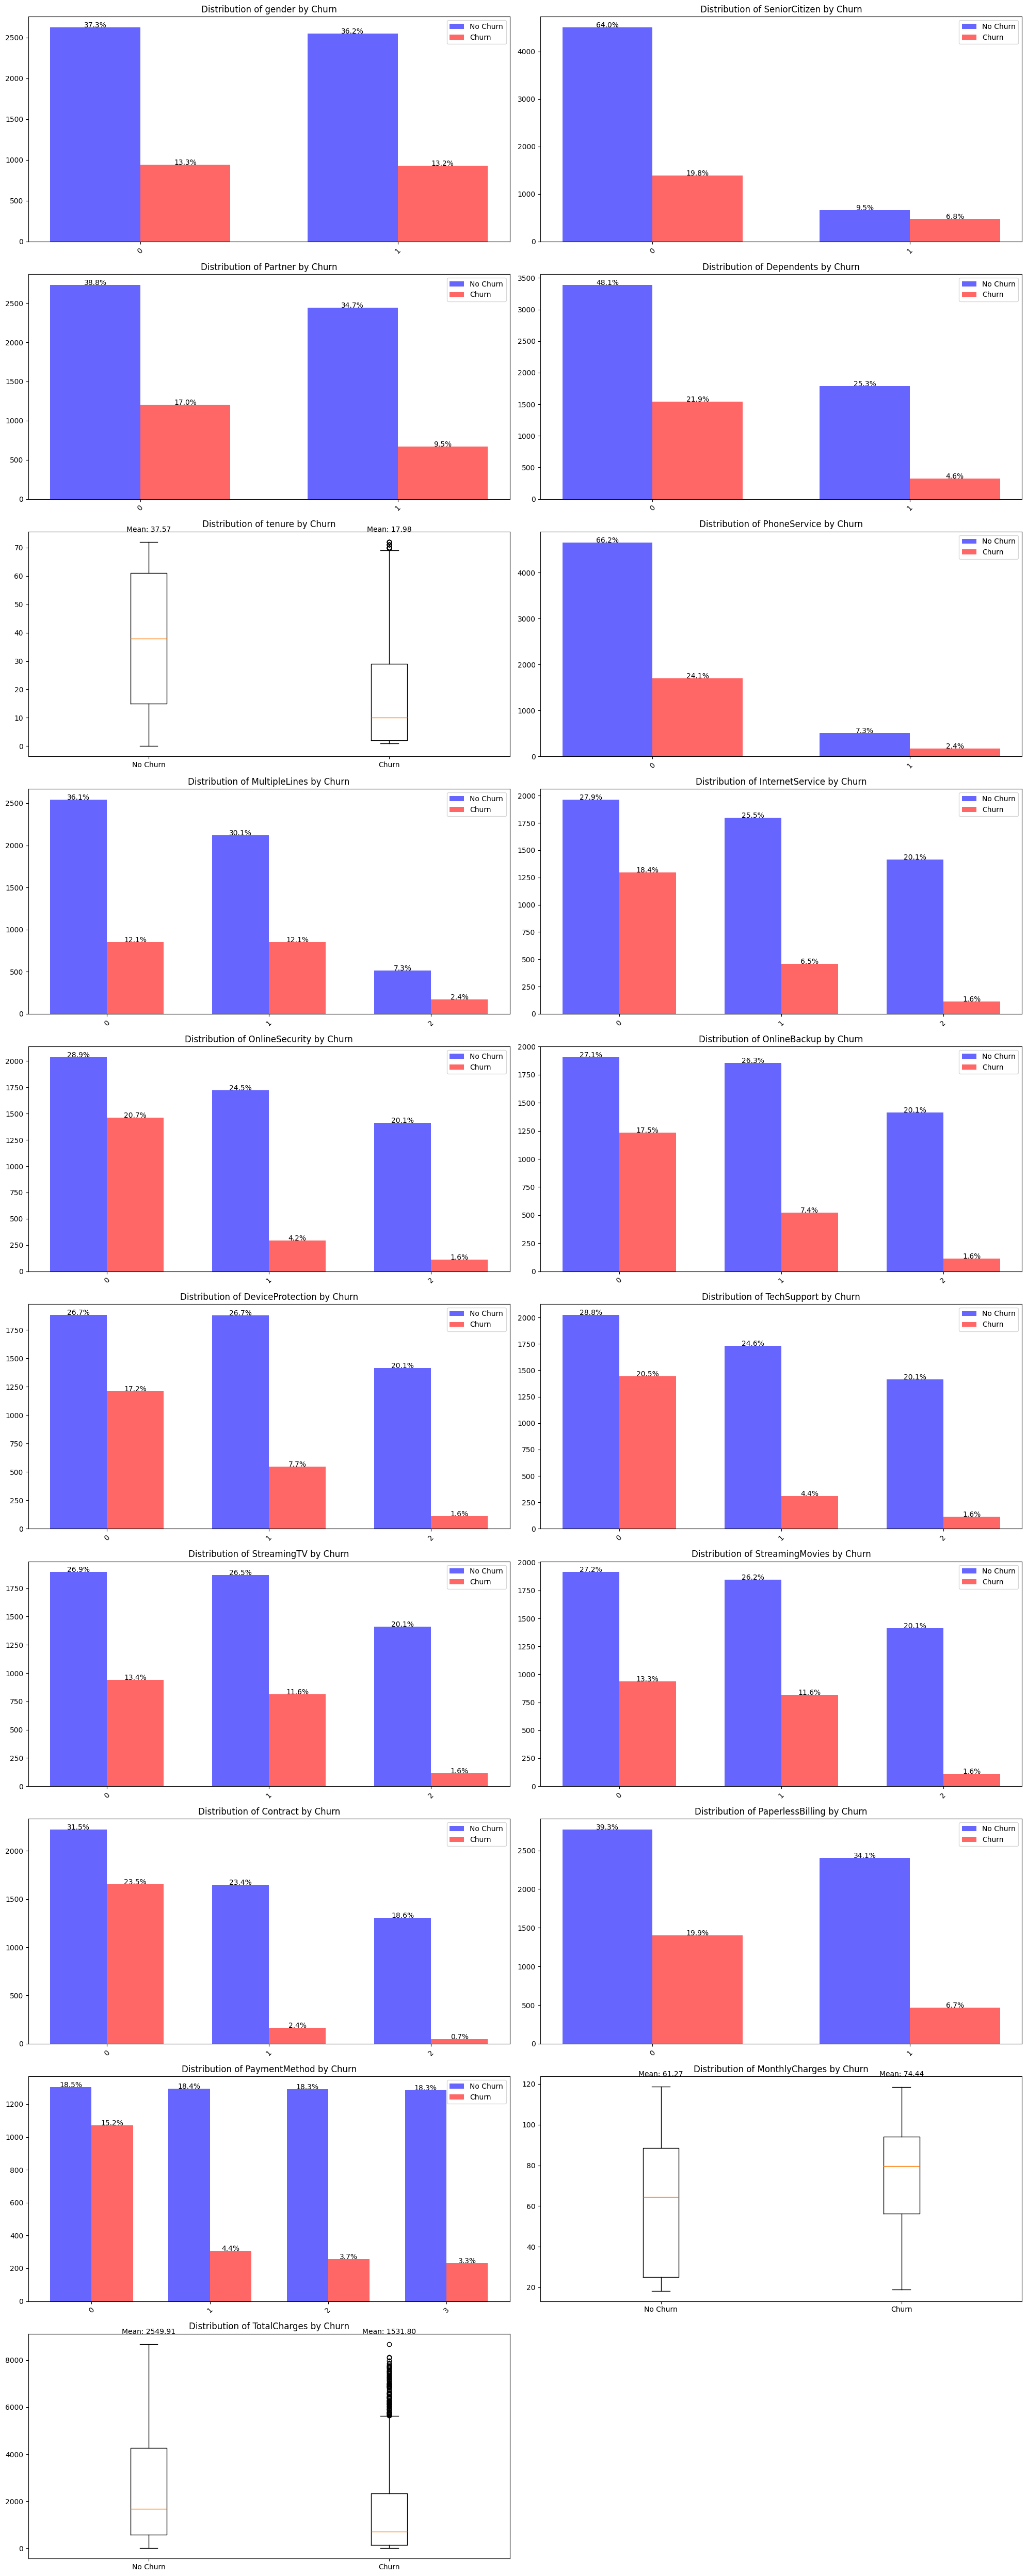

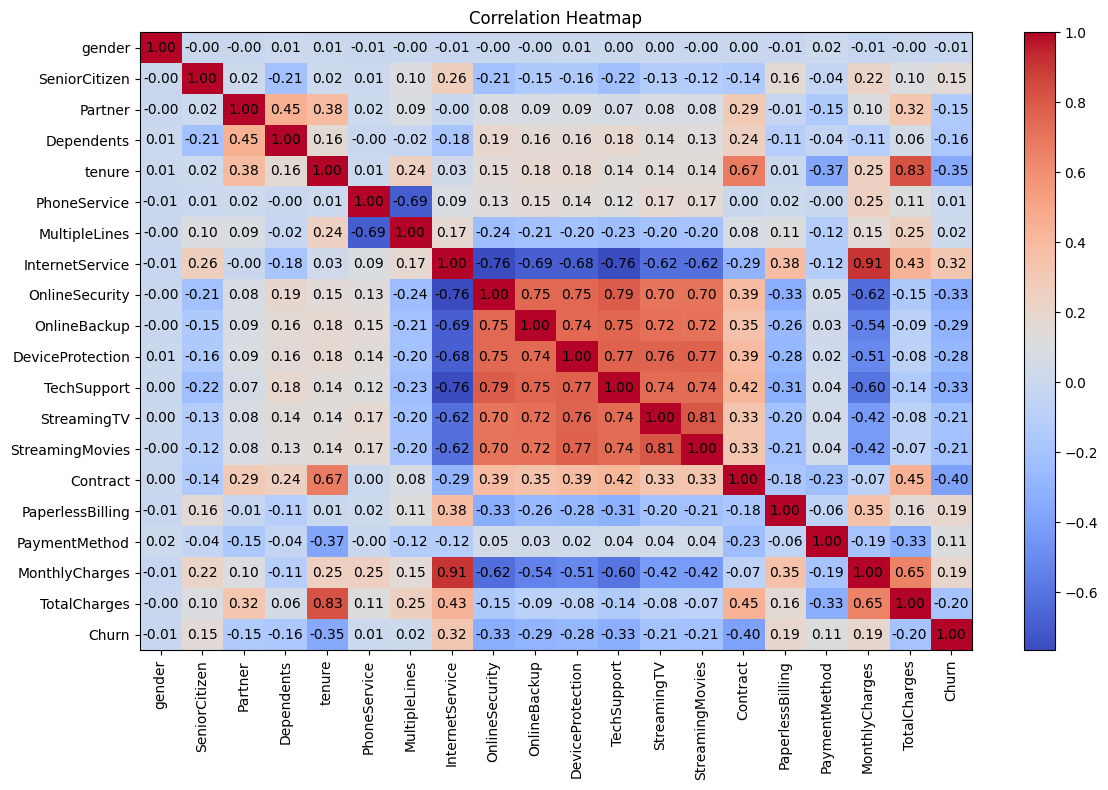


Summary Statistics for Numerical Features by Churn:
       gender                                              SeniorCitizen   
        count      mean       std  min  25%  50%  75%  max         count   
Churn                                                                      
0      5174.0  0.507344  0.499994  0.0  0.0  1.0  1.0  1.0        5174.0  \
1      1869.0  0.497592  0.500128  0.0  0.0  0.0  1.0  1.0        1869.0   

                 ... TotalCharges            Churn                            
           mean  ...          75%      max   count mean  std  min  25%  50%   
Churn            ...                                                          
0      0.128721  ...      4262.85  8672.45  5174.0  0.0  0.0  0.0  0.0  0.0  \
1      0.254682  ...      2331.30  8684.80  1869.0  1.0  0.0  1.0  1.0  1.0   

                 
       75%  max  
Churn            
0      0.0  0.0  
1      1.0  1.0  

[2 rows x 160 columns]


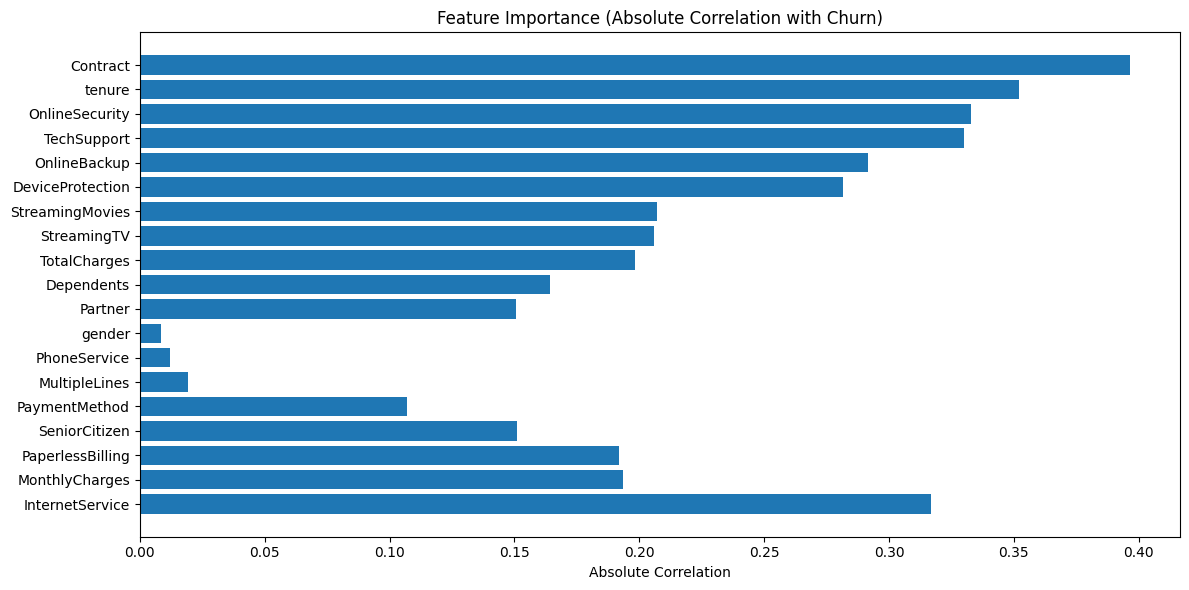


Feature Importance (based on absolute correlation with Churn):
Contract            0.396713
tenure              0.352229
OnlineSecurity      0.332819
TechSupport         0.329852
InternetService     0.316846
OnlineBackup        0.291449
DeviceProtection    0.281465
StreamingMovies     0.207256
StreamingTV         0.205742
TotalCharges        0.198324
MonthlyCharges      0.193356
PaperlessBilling    0.191825
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
MultipleLines       0.019423
PhoneService        0.011942
gender              0.008612
Name: Churn, dtype: float64

Mean Values by Churn Status:
         gender  SeniorCitizen   Partner  Dependents     tenure  PhoneService   
Churn                                                                           
0      0.507344       0.128721  0.528218    0.344801  37.569965      0.901044  \
1      0.497592       0.254682  0.357945    0.174425  17.979133      0.909042   

  

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the processed data
df = pd.read_csv("processed_telco_data.csv")

# Calculate correlation with Churn
correlation = df.corr()['Churn'].sort_values(ascending=False)
print("\nCorrelation with Churn:")
print(correlation)

# Set up the plotting
n_features = len(df.columns) - 1  # excluding Churn
n_rows = (n_features + 1) // 2  # 2 plots per row
fig = plt.figure(figsize=(20, 5 * n_rows))

# Plot for each feature
for idx, column in enumerate(df.columns):
    if column != 'Churn':
        plt.subplot(n_rows, 2, idx + 1)
        
        if df[column].nunique() <= 5:  # Categorical features
            # Calculate value counts for each category split by Churn
            churn_0 = df[df['Churn'] == 0][column].value_counts()
            churn_1 = df[df['Churn'] == 1][column].value_counts()
            
            # Plot bars
            x = np.arange(len(set(df[column])))
            width = 0.35
            
            plt.bar(x - width/2, churn_0, width, label='No Churn', color='blue', alpha=0.6)
            plt.bar(x + width/2, churn_1, width, label='Churn', color='red', alpha=0.6)
            
            plt.title(f'Distribution of {column} by Churn')
            plt.xticks(x, sorted(set(df[column])), rotation=45)
            plt.legend()
            
            # Add percentages
            total = len(df)
            for i, v in enumerate(churn_0):
                plt.text(i - width/2, v, f'{100*v/total:.1f}%', ha='center')
            for i, v in enumerate(churn_1):
                plt.text(i + width/2, v, f'{100*v/total:.1f}%', ha='center')
                
        else:  # Numerical features
            # Create box plots
            plt.boxplot([df[df['Churn'] == 0][column], df[df['Churn'] == 1][column]], 
                       labels=['No Churn', 'Churn'])
            plt.title(f'Distribution of {column} by Churn')
            
            # Add mean values
            means = df.groupby('Churn')[column].mean()
            for i, mean_val in enumerate(means):
                plt.text(i + 1, plt.ylim()[1], f'Mean: {mean_val:.2f}', 
                        horizontalalignment='center')

plt.tight_layout()
plt.show()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')

# Add correlation values as text
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                ha='center', va='center')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Numerical Features by Churn:")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(df.groupby('Churn')[numerical_cols].describe())

# Calculate and plot feature importance
feature_importance = abs(correlation)
feature_importance = feature_importance.drop('Churn')

plt.figure(figsize=(12, 6))
y_pos = np.arange(len(feature_importance))
plt.barh(y_pos, feature_importance.values)
plt.yticks(y_pos, feature_importance.index)
plt.xlabel('Absolute Correlation')
plt.title('Feature Importance (Absolute Correlation with Churn)')
plt.tight_layout()
plt.show()

# Additional numerical analysis
print("\nFeature Importance (based on absolute correlation with Churn):")
print(feature_importance.sort_values(ascending=False))

# Calculate mean values for numerical features by churn status
numerical_means = df.groupby('Churn')[numerical_cols].mean()
print("\nMean Values by Churn Status:")
print(numerical_means)

In [42]:
# Set the experiment name
mlflow.set_experiment('Churn predictions')

<Experiment: artifact_location='file:///c:/Users/mahmo/Desktop/hw/mlruns/766433032875201313', creation_time=1740317305855, experiment_id='766433032875201313', last_update_time=1740317305855, lifecycle_stage='active', name='Churn predictions', tags={}>

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import mlflow
import mlflow.sklearn
import pandas as pd

# Reload dataset
df = pd.read_csv("processed_telco_data.csv")

# Drop weakly correlated features
features_to_drop = [
    'gender', 'PhoneService', 'MultipleLines', 'PaymentMethod',
    'Partner', 'Dependents', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'
]

# Train-test split (75-25)
X = df.drop(features_to_drop + ["Churn"], axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

with mlflow.start_run():
    # Logistic Regression with L1 Regularization (Lasso)
    model = LogisticRegression(random_state=101, penalty='l1', solver='liblinear', C=0.5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    mlflow.log_param("test_size", 0.25)
    mlflow.log_param("penalty", "l1")
    mlflow.log_param("solver", "liblinear")
    mlflow.log_param("C", 0.5)
    mlflow.log_metric("accuracy", accuracy)
    mlflow.sklearn.log_model(model, "model")

    print(f"Variation 3 - Logistic Regression Accuracy: {accuracy}")
    
    # Print remaining features
    print("\nFeatures used in the model:")
    for i, feature in enumerate(X.columns):
        print(f"{i+1}. {feature}")


2025/02/23 15:55:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Variation 3 - Logistic Regression Accuracy: 0.797274275979557

Features used in the model:
1. SeniorCitizen
2. tenure
3. InternetService
4. OnlineSecurity
5. OnlineBackup
6. DeviceProtection
7. TechSupport
8. StreamingTV
9. StreamingMovies
10. Contract


In [60]:

# Get the list of runs in the experiment
experiment_id = mlflow.get_experiment_by_name('Churn predictions').experiment_id  # Replace with your experiment ID or get it by name
runs = mlflow.search_runs(experiment_ids=experiment_id)

# Print run details
print(runs[['run_id', 'status', 'metrics.accuracy']])


                             run_id    status  metrics.accuracy
0  86e004c6a585423d93b7da03fc30b858  FINISHED          0.797274
1  3bd3cd852f154dab97ae55218609ac2d  FINISHED          0.794180
2  61b02dbf7e8844b0aec80ad3b39d875b  FINISHED          0.804543
3  4baca5c0c6a840f2a493741d57ae9172  FINISHED          0.813343
